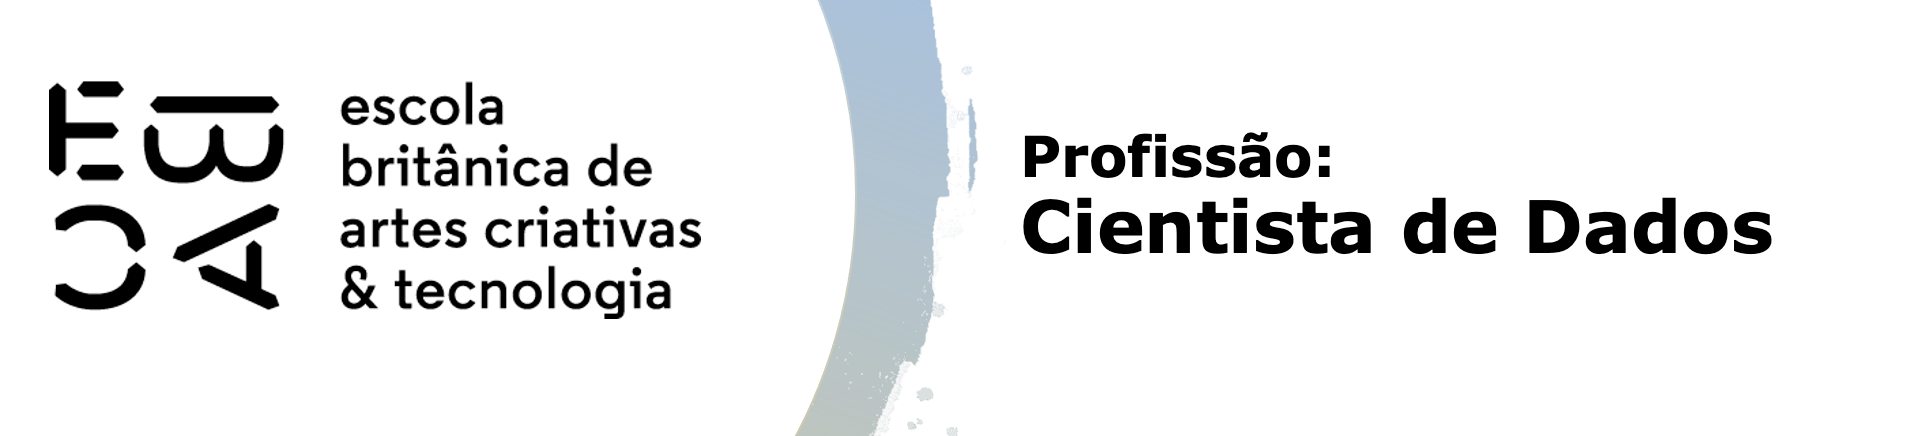

# Probabilidade - Tarefa

In [38]:
import pandas as pd
import numpy as np

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

1. Uma máquina embala ração para cachorro em pacotes de 15 kg, mas cada pacote produzido acaba tendo um peso aleatório, com distribuição Normal, com média 15kg, mas com desvio padrão 0,1 kg. Obtenha a probabilidade de que um pacote selecionado aleatoriamente dessa produção tenha mais que 15,2 kg.

In [39]:
pdf = stats.norm.pdf(15.2, loc=15, scale=.1)
prob = 1 - stats.norm.cdf(15.2, loc=15, scale=.1)
print(f'A função de densidade de probabilidade no ponto x=15.2 é igual a aproximadamente {pdf:.2f}')
print(f'A probabilidade de um pacote selecionado aleatorimente na distribuição pesar mais que 15.2 kg é igual a {prob*100:.2f}%')

A função de densidade de probabilidade no ponto x=15.2 é igual a aproximadamente 0.54
A probabilidade de um pacote selecionado aleatorimente na distribuição pesar mais que 15.2 kg é igual a 2.28%


2. Da máquina descrita acima, obtenha o percentil de ordem 95% para o peso dos pacotes. Ou seja, o valor tal que a probabilidade de um pacote ter peso menor que este seja de 95%.

In [40]:
ppf = stats.norm.ppf(.95, loc=15, scale=.1)
print(f'O percentil de ordem 95% para o peso dos pacotes é igual a {ppf:.4f} kg. \nOu seja, a probabilidade de um pacote aleatório pesar menos que este é de 95%')

O percentil de ordem 95% para o peso dos pacotes é igual a 15.1645 kg. 
Ou seja, a probabilidade de um pacote aleatório pesar menos que este é de 95%


3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, a probabilidade de ser menor que cada um dos valores contidos no objeto $Y$ na célula abaixo:

In [41]:
Y=np.linspace(-6, 6, 200)

Y1_prob = 1 - stats.norm.cdf(Y, loc=0, scale=1)
Y2_prob = 1 - stats.t.cdf(Y, df=5, loc=0, scale=1)

pd.set_option('display.float_format', '{:.10f}'.format)

df1 = pd.DataFrame({'Y': Y, 'Y1_Prob': Y1_prob, 'Y2_Prob': Y2_prob})

df1.head(5)

,Y,Y1_Prob,Y2_Prob
0,-6.0000000000,0.9999999990,0.9990769309
1,-5.9396984925,0.9999999986,0.9990342927
2,-5.8793969849,0.9999999979,0.9989893179
3,-5.8190954774,0.9999999970,0.9989418588
4,-5.7587939698,0.9999999958,0.9988917575


4. Faça uma visualização gráfica dos dados do item anterior.

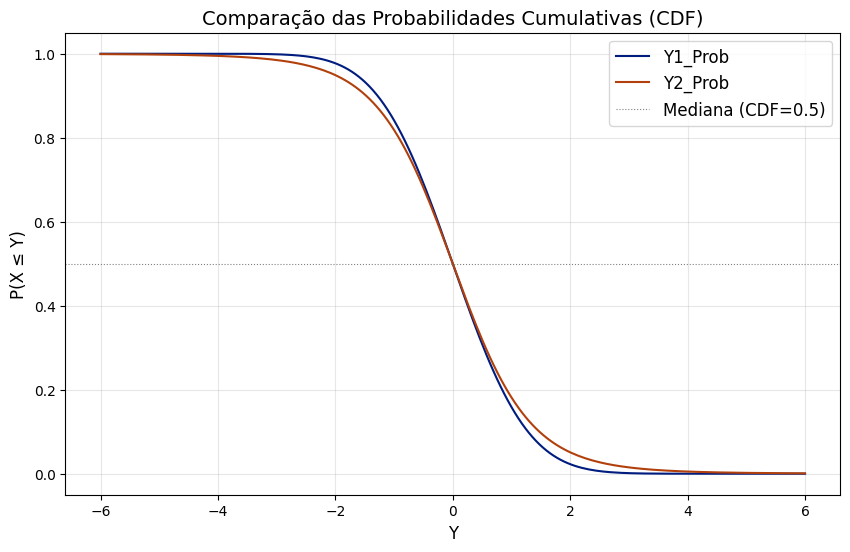

In [42]:
df_long1 = df1.melt(id_vars=['Y'], value_vars=['Y1_Prob', 'Y2_Prob'], var_name='Distribuição', value_name='Probabilidade')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long1, x='Y', y='Probabilidade', hue='Distribuição', palette='dark')

plt.title('Comparação das Probabilidades Cumulativas (CDF)', fontsize=14)
plt.axhline(0.5, color='gray', linestyle=':', linewidth=0.8, label='Mediana (CDF=0.5)')
plt.xlabel('Y', fontsize=12)
plt.ylabel('P(X ≤ Y)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

plt.show()

5. 3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, o percentil (a inversa da *CDF*) para cada um dos valores do objeto *P* abaixo:

In [43]:
P=np.linspace(0, 1, 20)

Y1_percentil = stats.norm.ppf(P, loc=0, scale=1)
Y2_percentil = stats.t.ppf(P, df=5, loc=0, scale=1)

df2 = pd.DataFrame({'P': P, 'Y1_Percentil': Y1_percentil, 'Y2_Percentil': Y2_percentil})

df2.head(5)

,P,Y1_Percentil,Y2_Percentil
0,0.0000000000,-inf,-inf
1,0.0526315789,-1.6198562586,-1.9748934585
2,0.1052631579,-1.2521195203,-1.4358592953
3,0.1578947368,-1.0031479677,-1.1143961939
4,0.2105263158,-0.8045963804,-0.8761244100


6. Faça um gráfico com os dados do item anterior.

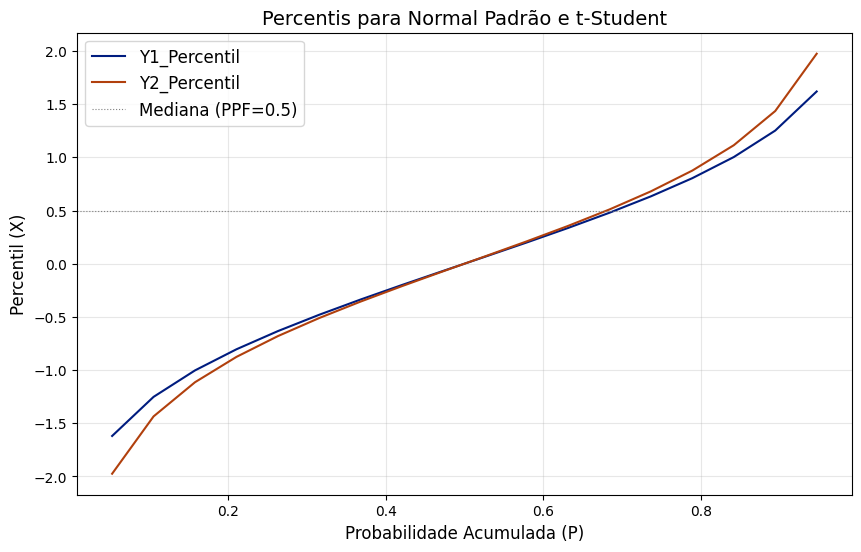

In [45]:
df_long2 = df2.melt(id_vars=['P'], value_vars=['Y1_Percentil', 'Y2_Percentil'], 
                    var_name='Distribuição', value_name='Percentil')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long2, x='P', y='Percentil', hue='Distribuição', palette='dark')

plt.title('Percentis para Normal Padrão e t-Student', fontsize=14)
plt.axhline(0.5, color='gray', linestyle=':', linewidth=0.8, label='Mediana (PPF=0.5)')
plt.xlabel('Probabilidade Acumulada (P)', fontsize=12)
plt.ylabel('Percentil (X)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

plt.show()